# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

/Users/kai_graham/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
# Your code here - Manipulate column names
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [4]:
df.columns = [col_formatting(col) for col in df.columns]

In [5]:
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [7]:
# Your code here - Define the target and predictors
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

train, test = train_test_split(df)

In [8]:
print(len(train), len(test))
train.head()

8152 2718


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
6194,1.762569,146.3878,9.795146,0.390333,0.783383,1.083511,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4820,-0.345204,21.6000,-0.230945,-0.481010,-1.911094,-0.204063,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8464,-0.252567,45.4870,-0.063378,-0.306741,-0.667489,-0.204063,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9208,-0.454683,32.9278,-0.426440,-2.397964,-1.082024,-3.583946,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
405,-0.530476,14.9900,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [9]:
# fitting actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     553.3
Date:                Fri, 19 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:40:37   Log-Likelihood:                -40484.
No. Observations:                8152   AIC:                         8.116e+04
Df Residuals:                    8057   BIC:                         8.182e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.0668      1.710     36.891      0.000      59.716      66.418
piece_count                                         77.2772      0.885     87.332      0.000      75.543      79.012
num_reviews                                          6.8992      0.693      9.949      0.000       5.540       8.259
play_star_rating                                     5.8338      0.620      9.409      0.000       4.618       7.049
star_rating                                         -1.6707      0.711     -2.349      0.019      -3.065      -0.277
val_star_rating                                     -8.7864      0.631    -13.934      0.000     -10.022      -7.550
ages_10plus                                        127.9642      6.618     19.337      0.000     114.992     140.936
ages_10_14                                         -22.2054      8.870     -2.503      0.012     -39.593      -4.818
ages_10_16                                         -11.2490      4.123     -2.728      0.006     -19.332      -3.166
ages_10_21                                          52.1106      7.263      7.174      0.000      37.872      66.349
ages_11_16                                         -19.5829      5.531     -3.541      0.000     -30.425      -8.741
ages_12plus                                         68.2086      5.476     12.456      0.000      57.474      78.943
ages_12_16                                         -54.4503      7.464     -7.295      0.000     -69.082     -39.818
ages_14plus                                         24.4767      4.099      5.971      0.000      16.441      32.512
ages_16plus                                         28.9828      6.071      4.774      0.000      17.081      40.884
ages_1half_3                                        -8.8799      2.398     -3.703      0.000     -13.581      -4.179
ages_1half_5                                        -3.9207      2.955     -1.327      0.185      -9.713       1.871
ages_2_5                                            15.2546      1.662      9.181      0.000      11.998      18.512
ages_4plus                                         -18.3499      6.879     -2.667      0.008     -31.835      -4.865
ages_4_7                                            -5.6624      3.605     -1.571      0.116     -12.730       1.405
ages_4_99                                           -2.9685      3.861     -0.769      0.442     -10.537       4.600
ages_5plus                                          -8.8743      3.007     -2.951      0.003     -14.768      -2.980
ages_5_12                                          -32.9698      3.103    -10.625      0.000     -39.052     -26.887
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [10]:
# Your code here - Remove features which do not appear to be statistically relevant
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 73
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,63.0668,1.710,36.891,0.000,59.716,66.418
piece_count,77.2772,0.885,87.332,0.000,75.543,79.012
num_reviews,6.8992,0.693,9.949,0.000,5.540,8.259
play_star_rating,5.8338,0.620,9.409,0.000,4.618,7.049
star_rating,-1.6707,0.711,-2.349,0.019,-3.065,-0.277


In [11]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     722.4
Date:                Fri, 19 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:40:38   Log-Likelihood:                -40493.
No. Observations:                8152   AIC:                         8.113e+04
Df Residuals:                    8079   BIC:                         8.164e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           62.7729      2.098     29.925      0.000      58.661      66.885
piece_count                                         77.3937      0.867     89.227      0.000      75.693      79.094
num_reviews                                          6.8674      0.683     10.060      0.000       5.529       8.206
play_star_rating                                     5.7955      0.605      9.577      0.000       4.609       6.982
star_rating                                         -1.5549      0.696     -2.233      0.026      -2.920      -0.190
val_star_rating                                     -8.6781      0.599    -14.498      0.000      -9.851      -7.505
ages_10plus                                        122.6485      4.898     25.040      0.000     113.047     132.250
ages_10_14                                         -16.9829      9.232     -1.840      0.066     -35.079       1.113
ages_10_16                                          -6.6132      3.989     -1.658      0.097     -14.433       1.206
ages_10_21                                          43.6663      3.252     13.428      0.000      37.292      50.041
ages_11_16                                         -14.9692      5.351     -2.797      0.005     -25.459      -4.480
ages_12plus                                         69.4602      6.008     11.562      0.000      57.684      81.237
ages_12_16                                         -49.2720      7.863     -6.266      0.000     -64.686     -33.858
ages_14plus                                         29.0849      4.760      6.110      0.000      19.754      38.415
ages_16plus                                         33.0001      6.812      4.845      0.000      19.647      46.353
ages_1half_3                                        -2.1426      3.129     -0.685      0.494      -8.277       3.992
ages_2_5                                            21.8504      1.961     11.140      0.000      18.005      25.695
ages_4plus                                         -15.0375     10.548     -1.426      0.154     -35.714       5.639
ages_5plus                                          -6.5650      3.032     -2.165      0.030     -12.509      -0.621
ages_5_12                                          -27.0915      2.668    -10.155      0.000     -32.321     -21.862
ages_6plus                                         -20.3936      5.665     -3.600      0.000     -31.498      -9.289
ages_6_12                                          -15.4856      1.875     -8.261      0.000     -19.160     -11.811
ages_7_12                                          -15.3708      2.269     -6.774      0.000     -19.819     -10.923
ages_7_14                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [12]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

74 61
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,62.7729,2.098,29.925,0.000,58.661,66.885
piece_count,77.3937,0.867,89.227,0.000,75.693,79.094
num_reviews,6.8674,0.683,10.060,0.000,5.529,8.206
play_star_rating,5.7955,0.605,9.577,0.000,4.609,6.982
star_rating,-1.5549,0.696,-2.233,0.026,-2.920,-0.190


In [13]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     865.7
Date:                Fri, 19 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:40:38   Log-Likelihood:                -40504.
No. Observations:                8152   AIC:                         8.113e+04
Df Residuals:                    8091   BIC:                         8.156e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.4447      1.268     50.813      0.000      61.959      66.931
piece_count                                         77.3185      0.843     91.710      0.000      75.666      78.971
num_reviews                                          6.4022      0.635     10.076      0.000       5.157       7.648
play_star_rating                                     6.0227      0.596     10.099      0.000       4.854       7.192
star_rating                                         -1.7065      0.692     -2.465      0.014      -3.064      -0.349
val_star_rating                                     -8.7333      0.595    -14.670      0.000      -9.900      -7.566
ages_10plus                                        124.7683      4.791     26.044      0.000     115.377     134.159
ages_10_21                                          44.3071      3.174     13.958      0.000      38.085      50.529
ages_11_16                                         -12.5724      5.185     -2.425      0.015     -22.735      -2.409
ages_12plus                                         72.5141      5.849     12.398      0.000      61.049      83.979
ages_12_16                                         -44.2621      7.643     -5.791      0.000     -59.244     -29.280
ages_14plus                                         35.3935      4.165      8.498      0.000      27.229      43.558
ages_16plus                                         38.4114      6.446      5.959      0.000      25.775      51.047
ages_2_5                                            22.7609      1.832     12.421      0.000      19.169      26.353
ages_5plus                                          -6.8821      2.933     -2.347      0.019     -12.631      -1.133
ages_5_12                                          -25.8798      2.574    -10.055      0.000     -30.925     -20.834
ages_6plus                                         -19.0166      5.604     -3.393      0.001     -30.002      -8.031
ages_6_12                                          -13.8654      1.680     -8.255      0.000     -17.158     -10.573
ages_7_12                                          -13.6828      2.094     -6.535      0.000     -17.787      -9.579
ages_7_14                                           -9.4031      1.769     -5.315      0.000     -12.871      -5.935
ages_8plus                                          14.5638      4.220      3.451      0.001       6.291      22.837
ages_8_12                                          -12.4969      2.624     -4.762      0.000     -17.641      -7.353
ages_8_14                                           -8.6196      1.851     -4.656      0.000     -12.249      -4.990
ages_9plus                               

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [14]:
# Your code here - Code a way to identify multicollinearity
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

/Users/kai_graham/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.407318532747789),
 ('num_reviews', 2.4906683801743887),
 ('play_star_rating', 2.3883954091932145),
 ('star_rating', 3.171945325837435),
 ('val_star_rating', 2.375876782706323),
 ('ages_10plus', 7.098187001529784),
 ('ages_10_21', 1.0528263240109115),
 ('ages_11_16', 1.1419677108934279),
 ('ages_12plus', 6.121436100038428),
 ('ages_12_16', 1.1520946211753103),
 ('ages_14plus', 1.8099168546939592),
 ('ages_16plus', 9.009904437582827),
 ('ages_2_5', 1.189401472978858),
 ('ages_5plus', inf),
 ('ages_5_12', 3.193623558446522),
 ('ages_6plus', 2.6622740266402327),
 ('ages_6_12', 1.8373640769880402),
 ('ages_7_12', 1.4553135830476778),
 ('ages_7_14', 1.7305676323727444),
 ('ages_8plus', 2.579265045685291),
 ('ages_8_12', 1.2535299087013314),
 ('ages_8_14', 1.7709314471666224),
 ('ages_9plus', 1.408226462684173),
 ('ages_9_12', 1.0190396504439367),
 ('ages_9_14', 1.7680189182269368),
 ('theme_name_Architecture', 5.225494259862206),
 ('theme_name_BOOST', 1.0638048724986828),


## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [15]:
# Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

61 54


In [16]:
# Your code here - Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     865.7
Date:                Fri, 19 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:40:40   Log-Likelihood:                -40875.
No. Observations:                8152   AIC:                         8.186e+04
Df Residuals:                    8097   BIC:                         8.224e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           67.3628      1.104     61.039      0.000      65.199      69.526
piece_count                                         79.3001      0.680    116.698      0.000      77.968      80.632
num_reviews                                          4.9139      0.620      7.924      0.000       3.698       6.130
play_star_rating                                     6.9756      0.551     12.658      0.000       5.895       8.056
star_rating                                         -2.7935      0.700     -3.990      0.000      -4.166      -1.421
val_star_rating                                     -9.4444      0.620    -15.235      0.000     -10.660      -8.229
ages_10_21                                          41.7065      3.272     12.747      0.000      35.293      48.120
ages_11_16                                         -24.4304      5.120     -4.772      0.000     -34.467     -14.394
ages_12_16                                         -56.6122      7.701     -7.351      0.000     -71.708     -41.517
ages_14plus                                         15.1503      3.644      4.158      0.000       8.008      22.293
ages_2_5                                            20.5571      1.807     11.374      0.000      17.014      24.100
ages_5_12                                          -29.5081      2.629    -11.222      0.000     -34.662     -24.354
ages_6plus                                         -22.5838      5.819     -3.881      0.000     -33.991     -11.177
ages_6_12                                          -18.9888      1.634    -11.622      0.000     -22.192     -15.786
ages_7_12                                          -17.9543      2.101     -8.546      0.000     -22.072     -13.836
ages_7_14                                          -13.6462      1.741     -7.837      0.000     -17.059     -10.233
ages_8plus                                           2.4596      4.300      0.572      0.567      -5.970      10.889
ages_8_12                                          -17.0554      2.609     -6.537      0.000     -22.170     -11.941
ages_8_14                                          -14.5260      1.793     -8.100      0.000     -18.041     -11.011
ages_9plus                                          18.7302     11.127      1.683      0.092      -3.081      40.542
ages_9_12                                          -28.0982      6.042     -4.650      0.000     -39.943     -16.254
ages_9_14                                          -14.4574      2.506     -5.770      0.000     -19.369      -9.546
theme_name_BOOST                                    83.4507      9.196      9.075      0.000      65.424     101.477
theme_name_Blues_Helicopter_Pursuit      

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

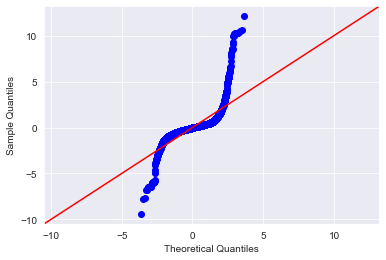

In [17]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

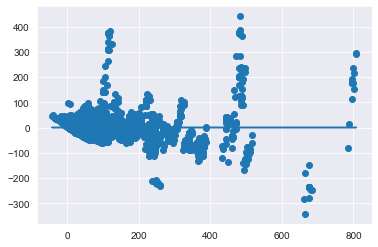

In [18]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

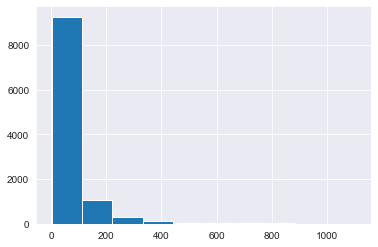

In [19]:
# Your code here - Check for outliers
df.list_price.hist()

In [20]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [21]:
orig_tot = len(df)
df = df[df.list_price < 450] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.010487580496780129


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     473.8
Date:                Fri, 19 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:40:40   Log-Likelihood:                -4863.6
No. Observations:                8067   AIC:                             9837.
Df Residuals:                    8012   BIC:                         1.022e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.3864      0.014    246.919      0.000       3.360       3.413
piece_count                                          0.6129      0.010     63.116      0.000       0.594       0.632
num_reviews                                         -0.0147      0.008     -1.945      0.052      -0.029       0.000
play_star_rating                                     0.1091      0.007     16.039      0.000       0.096       0.122
star_rating                                         -0.0546      0.009     -6.391      0.000      -0.071      -0.038
val_star_rating                                     -0.1133      0.008    -15.074      0.000      -0.128      -0.099
ages_10_21                                           0.7100      0.040     17.752      0.000       0.632       0.788
ages_11_16                                           0.2999      0.064      4.673      0.000       0.174       0.426
ages_12_16                                           0.0044      0.086      0.052      0.959      -0.164       0.173
ages_14plus                                          0.4881      0.047     10.484      0.000       0.397       0.579
ages_2_5                                             0.5096      0.022     22.917      0.000       0.466       0.553
ages_5_12                                           -0.6846      0.032    -21.132      0.000      -0.748      -0.621
ages_6plus                                          -0.8795      0.069    -12.752      0.000      -1.015      -0.744
ages_6_12                                           -0.1461      0.020     -7.317      0.000      -0.185      -0.107
ages_7_12                                            0.1287      0.025      5.209      0.000       0.080       0.177
ages_7_14                                            0.0360      0.021      1.702      0.089      -0.005       0.078
ages_8plus                                           0.6064      0.054     11.148      0.000       0.500       0.713
ages_8_12                                            0.2809      0.032      8.735      0.000       0.218       0.344
ages_8_14                                            0.3786      0.022     17.217      0.000       0.336       0.422
ages_9plus                                           0.1505      0.151      0.999      0.318      -0.145       0.446
ages_9_12                                            0.3956      0.084      4.715      0.000       0.231       0.560
ages_9_14                                            0.5063      0.031     16.549      0.000       0.446       0.566
theme_name_BOOST                                     0.9476      0.115      8.261      0.000       0.723       1.173
theme_name_Blues_Helicopter_Pursuit      

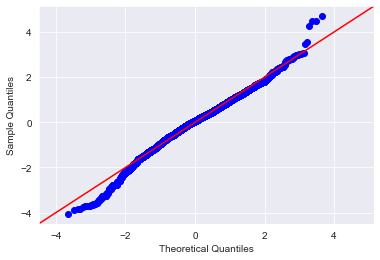

In [22]:
# Your code here - Check normality assumption
# Comment: This is much, much better!
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

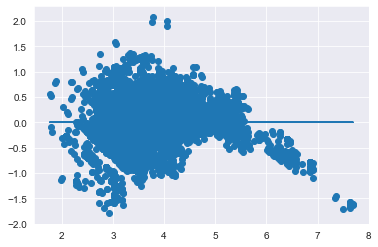

In [23]:
# Your code here - Check the Homoscedasticity Assumption
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [24]:
# Still some homoscedasticity - - need further preprocessing

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 